Before setting out to explore this data I will state a few questions that I would like to answer:
    1. What variables (Home Runs, Walks, Strike Outs, Errors, etc.) have the strongest correlation with success (winning percentage)?
    2. What is the cost (player salaries) of improving on these important factors?

Import relevant data

In [873]:
import pandas as pd
import numpy as np

batting_all_df = pd.read_csv('Batting.csv')
teams_all_df = pd.read_csv('Teams.csv')
pitching_all_df = pd.read_csv('Pitching.csv')
fielding_all_df = pd.read_csv('Fielding.csv')
salaries_all_df = pd.read_csv('Salaries.csv')


Get just the data from 1985 on because there is no salary data before then

In [874]:

teams_df = teams_all_df[teams_all_df['yearID']>=1985]


Define procedure to measure correlation between 2 variables

In [875]:
def correlation(x, y):
    x_avg = x.mean()
    y_avg = y.mean()
    x_stdz = (x - x_avg)/x.std(ddof=0)
    y_stdz = (y - y_avg)/y.std(ddof=0)
    return (x_stdz * y_stdz).mean()

Define procedure to standardize a variable

In [876]:
def standardize(df):
    return (df - df.mean())/df.std(ddof=0)

Add column Winning Percentage to teams_df

In [877]:
teams_wp = teams_df['W']/(teams_df['W']+teams_df['L'])

Calculate correlation between winning percentage and various offensive metrics on the team level

In [878]:
r_t = teams_df['R'] #runs; _t notes that this is a team calculation
hr_t = teams_df['HR'] #homeruns
so_t = teams_df['SO'] #strike outs
bb_t = teams_df['BB'] #walks
h_t= teams_df['H'] #hits
sb_t = teams_df['SB'] #stolen bases
doubles_t = teams_df['2B'] 
triples_t = teams_df['3B']
singles_t = h_t - hr_t - doubles_t - triples_t
ab_t = teams_df['AB'] # at bats
hbp_t = teams_df['HBP'] #hit by pitch
ba_t = h_t/ab_t #batting average
sf_t = teams_df['SF'] #sacrifice fly
obp_t = (h_t + bb_t + hbp_t)/(ab_t + bb_t + hbp_t + sf_t) #on base percentage
sp_t = (singles_t+(doubles_t*2)+(triples_t*3)+(hr_t*4))/ab_t #slugging percentage
ops_t = obp_t+sp_t #on base percentage plus slugging percentage



In [879]:
print 'Team Winning Percentage correlation with:'
print 'runs', correlation(team_wp,r_t)
print 'homeruns', correlation(team_wp,hr_t)
print 'strikeouts', correlation(team_wp,so_t)
print 'walks', correlation(team_wp,bb_t)
print 'stolen bases', correlation(team_wp,sb_t)
print 'doubles', correlation(team_wp,doubles_t)
print 'triples', correlation(team_wp,triples_t)
print 'batting average', correlation(team_wp,ba_t)
print 'on base percentage', correlation(team_wp,obp_t)
print 'slugging percentage', correlation(team_wp,sp_t)
print 'OPS', correlation(team_wp,ops_t)


Team Winning Percentage correlation with:
runs 0.465868267873
homeruns 0.315574848406
strikeouts -0.0961045575452
walks 0.374281595441
stolen bases 0.112105638484
doubles 0.195201913417
triples -0.00652818674655
batting average 0.375183429585
on base percentage 0.497730969262
slugging percentage 0.403809906002
OPS 0.500272988656


Calculate correlation between winning percentage and various defensive/pitching metrics on the team level

In [880]:
ra_t = teams_df['RA'] #runs against
era_t = teams_df['ERA'] #earned run average
e_t = teams_df['E'] #errors
fp_t = teams_df['FP'] #fielding percentage
ha_t = teams_df['HA'] #hits against
soa_t = teams_df['SOA'] #strike outs against
bba_t = teams_df['BBA'] #walks against
cg_t = teams_df['CG'] #complete games




In [881]:
print 'Team Winning Percentage correlation with:'
print 'runs against', correlation(team_wp,ra_t)
print 'ERA', correlation(team_wp,era_t)
print 'errors', correlation(team_wp,e_t)
print 'fielding percentage', correlation(team_wp,fp_t)
print 'hits against', correlation(team_wp,ha_t)
print 'strikeouts against', correlation(team_wp,soa_t)
print 'walks against', correlation(team_wp,bba_t)
print 'complete games', correlation(team_wp,cg_t)


Team Winning Percentage correlation with:
runs against -0.545882069178
ERA -0.557169875387
errors -0.283302790633
fielding percentage 0.208031672218
hits against -0.376872149077
strikeouts against 0.246233958276
walks against -0.369954199535
complete games 0.0973014249249


OPS, on base percentage, runs, runs against, and era have the strongest correlation to winning percentage for the variables tested.  This makes intuitive sense because a team that scores more runs than they give up wins.  

Let's take a deeper dive into offense, particularly what may be an indicator for runs.  I want to see which variables have the strongest correlation with runs.  Then I want to look at salary data to see if the same variables that are correlated with runs are correlated with salaries. 

In [882]:
print 'Runs scored correlation with:'
print 'homeruns', correlation(r_t,hr_t)
print 'doubles', correlation(r_t,doubles_t)
print 'triples', correlation(r_t,triples_t)
print 'stolen bases', correlation(r_t,sb_t)
print 'walks', correlation(r_t,bb_t)
print 'strikeouts', correlation(r_t,so_t)
print 'batting average', correlation(r_t,ba_t)
print 'on base percentage', correlation(r_t,obp_t)
print 'slugging percentage', correlation(r_t,sp_t)
print 'OPS', correlation(r_t,ops_t)

#create panda series for visualization below

runs_correlates = pd.Series([correlation(r_t,hr_t),correlation(r_t,doubles_t),correlation(r_t,triples_t),correlation(r_t,sb_t),correlation(r_t,bb_t),correlation(r_t,so_t),correlation(r_t,ba_t),correlation(r_t,obp_t),correlation(r_t,sp_t),correlation(r_t,ops_t)], index = ['hr','2b','3b','sb','bb','so','ba','obp','sp','ops'])

Runs scored correlation with:
homeruns 0.735708673515
doubles 0.646486468741
triples 0.0579004049868
stolen bases -0.000672805200834
walks 0.632338708796
strikeouts 0.0599272154014
batting average 0.715060636561
on base percentage 0.83858456777
slugging percentage 0.807658418221
OPS 0.892903495998


OPS, which encapsulates how often a team/player gets on base and how man bases they get per attempt, has the strongest correlation to runs.  It it possible that this doesn't mean OPS is the most important statistic listed above for scoring runs.  It is my opinion that it probably is since the factors it measures are factors you would expect to matter for scoring runs.

Prepare player data from 1985 through 2015.

In [883]:
#add 1 to all count stats below to adjust for zeros
ab_p = batting_all_df['AB'] + 1 #at bats; _p denotes player
r_p = batting_all_df['R'] + 1 
h_p = batting_all_df['H'] + 1
hr_p = batting_all_df['HR'] + 1 #homeruns
batting_all_df['HR/AB']=batting_all_df['HR']/batting_all_df['AB']
triples_p = batting_all_df['3B'] + 1
doubles_p = batting_all_df['2B'] + 1
rbi_p = batting_all_df['RBI'] + 1
sb_p = batting_all_df['SB'] + 1
bb_p = batting_all_df['BB'] + 1
so_p = batting_all_df['SO'] + 1
ibb_p = batting_all_df['IBB'] + 1
hbp_p = batting_all_df['HBP'] + 1
sf_p = batting_all_df['SF'] + 1
singles_p = batting_all_df['H'] - hr_p - triples_p - doubles_p + 1
ba_p = h_p/ab_p
obp_p = (h_p + bb_p + hbp_p)/(ab_p + bb_p + hbp_p + sf_p) #on base percentage
sp_p = (singles_p+(doubles_p*2)+(triples_p*3)+(hr_p*4))/ab_p #slugging percentage
batting_all_df['OPS'] = obp_p+sp_p
ops_p = batting_all_df['OPS']

In [884]:
#data from 1985 on because no salary data before 1985
batting_df = batting_all_df[batting_all_df['yearID']>=1985]
pitching_df = pitching_all_df[pitching_all_df['yearID']>=1985]
fielding_df = fielding_all_df[fielding_all_df['yearID']>=1985]
salaries_df = salaries_all_df[salaries_all_df['yearID']>=1985]

Merge batting and salaries dfs (batting_salaries).  Create bat_sal_everyday to drop players who get less than 200 at bats in the season out of the data.  The goal is to look at everyday players, so this should partially correct for players injured most of the year and players called up for a short time.

In [885]:

batting_salaries = batting_df.merge(salaries_df,on=['yearID','playerID'],how='inner') 
bat_sal_everyday = batting_salaries[batting_salaries['AB']>=200] 
len(bat_sal_everyday)

8952

In [886]:
salary_p = bat_sal_everyday['salary'] # player salary




Let's calculate player salaries to the same offensive statistics above, except at the player level.  If teams are being rational we should expect the strongest correlates to runs at the team level to be the highest correlates to player salaries at the player level (all else being equal).

In [887]:
print 'Correlation with player salaries:'
print 'homeruns', correlation(salary_p,hr_p)
print 'doubles', correlation(salary_p,doubles_p)
print 'triples', correlation(salary_p,triples_p)
print 'stolen bases', correlation(salary_p,sb_p)
print 'walks', correlation(salary_p,bb_p)
print 'strikouts', correlation(salary_p,so_p)
print 'batting average', correlation(salary_p,ba_p)
print 'on base percentage', correlation(salary_p,obp_p)
print 'slugging percentage', correlation(salary_p,sp_p)
print 'OPS', correlation(salary_p,ops_p)


Correlation with player salaries:
homeruns 0.0231560358442
doubles 0.0156497108952
triples -0.0405244637894
stolen bases -0.0765736782984
walks 0.0253122401575
strikouts -0.0273347064977
batting average 0.0196879916948
on base percentage 0.41179594562
slugging percentage 0.0155403824311
OPS 0.47574821865


It has occured to me that salaries have likely risen sharply since 1985 levels which may cause problems with my analysis.  Let's investigate:

Populating the interactive namespace from numpy and matplotlib


<Container object of 31 artists>

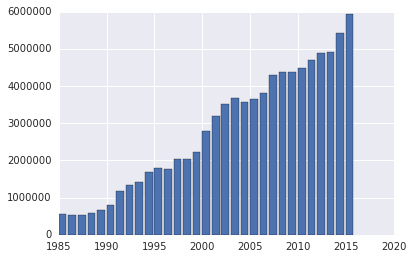

In [888]:
bat_sal_yr_grp = bat_sal_everyday.groupby('yearID',as_index=False).mean()
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.bar(bat_sal_yr_grp['yearID'],bat_sal_yr_grp['salary']) 
#returns bar plot of average salary per year

Salaries have risen sharply as I thought.  Let's adjust these salaries back to 1985 levels for comparison purposes.

In [889]:
#adjust salaries to 1985 levels to better compare across time

salary = bat_sal_yr_grp['salary'] # player salary
bat_sal_yr_grp['CPI'] = salary/salary[0] #calculate cpi for player salaries
cpi = bat_sal_yr_grp['CPI']
bat_sal_yr_grp['sal_real'] = salary/cpi #adjust salaries to 1985 levels for comparisons



In [890]:
#create df with player data from 1985 on, including yearly averages and salary data set
#at 1985 levels for comparison purposes
bat_sal_everyday_df = pd.DataFrame(bat_sal_everyday)
bat_sal_everyday_df = bat_sal_everyday_df.merge(bat_sal_yr_grp,on=['yearID'],how='inner')
bat_sal_everyday_df['sal_real']=bat_sal_everyday_df['salary_x']/bat_sal_everyday_df['CPI']

bat_sal_everyday_df.head()

,playerID,yearID,stint_x,teamID_x,lgID_x,G_x,AB_x,R_x,H_x,2B_x,...,IBB_y,HBP_y,SH_y,SF_y,GIDP_y,HR/AB_y,OPS_y,salary_y,CPI,sal_real
0,almonbi01,1985,1,PIT,NL,88,244,33,66,17,...,4.559322,2.275424,2.961864,3.728814,10.576271,0.027472,0.757271,566013.025424,1,255000
1,armasto01,1985,1,BOS,AL,103,385,50,102,17,...,4.559322,2.275424,2.961864,3.728814,10.576271,0.027472,0.757271,566013.025424,1,915000
2,backmwa01,1985,1,NYN,NL,145,520,77,142,24,...,4.559322,2.275424,2.961864,3.728814,10.576271,0.027472,0.757271,566013.025424,1,200000
3,baineha01,1985,1,CHA,AL,160,640,86,198,29,...,4.559322,2.275424,2.961864,3.728814,10.576271,0.027472,0.757271,566013.025424,1,675000
4,bakerdu01,1985,1,OAK,AL,111,343,48,92,15,...,4.559322,2.275424,2.961864,3.728814,10.576271,0.027472,0.757271,566013.025424,1,575000


In [891]:
sal_real= bat_sal_everyday_df['sal_real']

#again, add 1 to compensate for zeros
ab = bat_sal_everyday_df['AB_x'] +1  #at bats; _p denotes player
r = bat_sal_everyday_df['R_x'] +1 #runs
h = bat_sal_everyday_df['H_x']+1 #hits
hr = bat_sal_everyday_df['HR_x'] +1 #homeruns
triples = bat_sal_everyday_df['3B_x']+1 #triples
doubles = bat_sal_everyday_df['2B_x'] +1 #doubles
rbi = bat_sal_everyday_df['RBI_x'] +1 #rbis
sb = bat_sal_everyday_df['SB_x'] +1 #stolen bases
bb = bat_sal_everyday_df['BB_x'] +1 #walks
so = bat_sal_everyday_df['SO_x'] +1 #strikeouts
ibb = bat_sal_everyday_df['IBB_x'] +1 #intentional walks
hbp = bat_sal_everyday_df['HBP_x']+1 #hit by pitch
sf = bat_sal_everyday_df['SF_x'] +1 #sacrifice flies
singles = bat_sal_everyday_df['H_x'] - hr - triples - doubles+ 1 #singles
ba = h/ab #batting average
obp = (h + bb + hbp)/(ab + bb + hbp + sf) #on base percentage
sp = (singles+(doubles*2)+(triples*3)+(hr*4))/ab #slugging percentage
ops = bat_sal_everyday_df['OPS_x'] #on base plus slugging

In [892]:
print 'Salary at 1985 levels correlation with:'
print 'homeruns', correlation(sal_real,hr)
print 'doubles', correlation(sal_real,doubles)
print 'triples', correlation(sal_real,triples)
print 'stolen bases', correlation(sal_real,sb)
print 'walks', correlation(sal_real,bb)
print 'strike outs', correlation(sal_real,so)
print 'batting average', correlation(sal_real,ba)
print 'on base percentage', correlation(sal_real,obp)
print 'slugging percentage', correlation(sal_real,sp)
print 'OPS', correlation(sal_real,ops)


salary_correlates = pd.Series([correlation(sal_real,hr),correlation(sal_real,doubles),correlation(sal_real,triples),correlation(sal_real,sb),correlation(sal_real,bb),correlation(sal_real,so),correlation(sal_real,ba),correlation(sal_real,obp),correlation(sal_real,sp),correlation(sal_real,ops)], index = ['hr','2b','3b','sb','bb','so','ba','obp','sp','ops'])


Salary at 1985 levels correlation with:
homeruns 0.392302444022
doubles 0.253468632045
triples -0.0533849159051
stolen bases 0.0311563264113
walks 0.395470771227
strike outs 0.14821905742
batting average 0.205228938932
on base percentage 0.313378344361
slugging percentage 0.321458823111
OPS 0.34647113923


Populating the interactive namespace from numpy and matplotlib


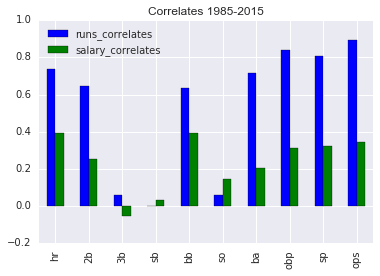

In [893]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
correlates = pd.DataFrame(dict(salary_correlates=salary_correlates, runs_correlates=runs_correlates))
correlates.plot.bar(title='Correlates 1985-2015')

Looking at the data above, it looks like teams are doing a pretty good job of paying for the right batter attributes.  However, OPS has the highest correlation with runs, but has the third highest correlation with salaries.  Homeruns and walks have the highest correlation with salaries, and are also highly correlated with runs.  It seems that during the time period, teams may have been valuing homeruns and walks highest - whereas, all else being equal, it would make more sense to value OPS higher.  It is important to note that over this time period, teams began applying data science to roster formation.  It is very possible that the data from a more recent time period may show teams valuing OPS highest.  I'll investigate that next.

In [894]:
#create columns identifying players whose salary and ops,salary and hr, salary and bb 
#are above average.  If teams have began paying more for these var
bat_sal_everyday_df['sal&ops'] =(bat_sal_everyday_df['salary_x'] >= bat_sal_everyday_df['salary_y']) & (bat_sal_everyday_df['OPS_x'] >= bat_sal_everyday_df['OPS_y']) 
bat_sal_everyday_df['sal&hr'] = (bat_sal_everyday_df['salary_x'] >= bat_sal_everyday_df['salary_y']) & (bat_sal_everyday_df['HR_x'] >= bat_sal_everyday_df['HR_y'])
bat_sal_everyday_df['sal&bb'] = (bat_sal_everyday_df['salary_x'] >= bat_sal_everyday_df['salary_y']) & (bat_sal_everyday_df['BB_x'] >= bat_sal_everyday_df['BB_y'])

#group by year
yearly_bat_sal = bat_sal_everyday_df.groupby('yearID').sum()

yearly_comp_df = pd.DataFrame(dict(sal_and_ops=yearly_bat_sal['sal&ops'],sal_and_hr=yearly_bat_sal['sal&hr'],sal_and_bb=yearly_bat_sal['sal&bb']))


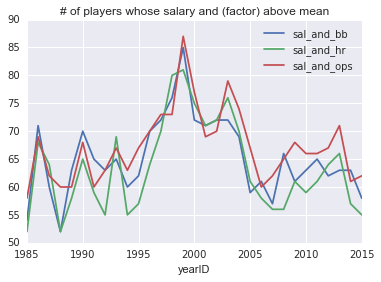

In [895]:
#examine trend over time
yearly_comp_df.plot(title='# of players whose salary and (factor) above mean' )

It appears that there is no significant increase in the number of players who have both above average salaries and an above average OPS, from 1985 to 2015. I will check to see if there is any trend in the number of players who are at least 1 standard deviation above the mean in the above categories categories. There was a pretty large jump in the middle for all three categories.  This increase could be incidental, but it looks like something may be going on. It does look like this rise occured during the peak of steroids in baseball.  This may be something else to evaluate later.

Try looking at 1 standard dev above for both sal and other factors.  Use apply(standardize(df)).

In [896]:
#create columns identifying players whose real salary and ops,real salary and hr, real salary and bb 
#are both 1 standard deviation above the mean.  If teams have began paying more for these var
bat_sal_everyday_df['sal&ops'] =(standardize(bat_sal_everyday_df['sal_real']) >= 1) & (standardize(bat_sal_everyday_df['OPS_x']) >= 1) 
bat_sal_everyday_df['sal&hr'] = (standardize(bat_sal_everyday_df['sal_real']) >= 1) & (standardize(bat_sal_everyday_df['HR_x']) >= 1)
bat_sal_everyday_df['sal&bb'] = (standardize(bat_sal_everyday_df['sal_real']) >= 1) & (standardize(bat_sal_everyday_df['BB_x']) >= 1)

#group by year
yearly_bat_sal = bat_sal_everyday_df.groupby('yearID').sum()

yearly_comp_one_stdev_df = pd.DataFrame(dict(sal_and_ops=yearly_bat_sal['sal&ops'],sal_and_hr=yearly_bat_sal['sal&hr'],sal_and_bb=yearly_bat_sal['sal&bb']))

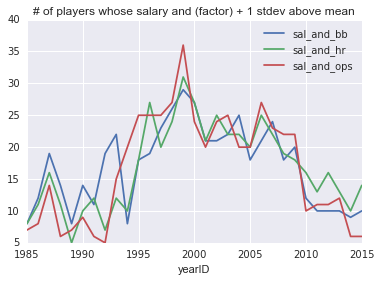

In [897]:
#examine trend over time
yearly_comp_one_stdev_df.plot(title='# of players whose salary and (factor) + 1 stdev above mean')

It doesn't appear that there is any significant difference in the relationship between OPS and salary now (2015) and 1985.  

I am still curious what caused the rise and decline in the 1990s and 2000s.  I suspect that steroids may be a contributing factor. I'm going to look at homerun data throught baseball history to see if anything sticks out.

In [898]:
batting_all_df['HR/AB']=batting_all_df['HR']/batting_all_df['AB']
batting_yearly_df = batting_all_df.groupby('yearID').mean()

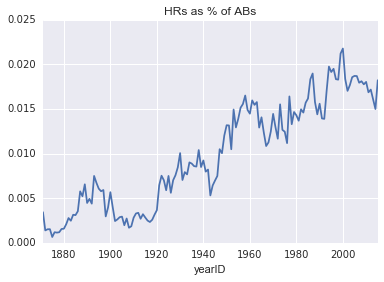

In [899]:
batting_yearly_df['HR/AB'].plot(title='HRs as % of ABs')

It looks like homeruns per at bat began to plateau around 1960, then rose sharply around 1990, before falling in the mid 2000s.  The MLB first implemented a steroid testing policy in 2004, so this timeline would make since.  Reference on steroid policy timeline: http://www.usatoday.com/story/sports/mlb/2014/03/28/a-timeline-of-mlbs-drug-testing-rules/7024351/

Let's conduct an independent t-test to see if there is any statistically significant difference between homeruns per at bat in 2000 and 2015.  The test will be two-tailed and will be done at the 95% confidence level.  H0: no difference in hr/ab between 2000 and 2015; 
HA: difference in hr/ab between 2000 and 2015.

In [900]:
#slice the df to show just data from each of the two years
batting_2000_df = batting_all_df[batting_all_df['yearID']==2000]
batting_2015_df = batting_all_df[batting_all_df['yearID']==2015]

In [901]:
#look only at data for players who had at least 200 at bats
#so data is mostly comprised of everyday players
batting_2000_df = batting_2000_df[batting_2000_df['AB']>=200]
batting_2015_df = batting_2015_df[batting_2015_df['AB']>=200]

In [902]:
def t_stat(mean1,mean2,se):
    return (mean1-mean2)/se

In [903]:
mean_hr_ab_2000 = batting_2000_df['HR/AB'].mean()
mean_hr_ab_2015 = batting_2015_df['HR/AB'].mean()
se_hr_ab_2000_2015 = sqrt((batting_2000_df['HR/AB'].var()/len(batting_2000_df['HR/AB']))+(batting_2015_df['HR/AB'].var()/len(batting_2015_df['HR/AB'])))

In [904]:
t_stat(mean_hr_ab_1995,mean_hr_ab_2015,se_hr_ab_1995_2015)

3.2295230881826504

In [905]:
df = len(batting_2000_df['HR/AB'])+len(batting_2015_df['HR/AB'])-2
df

638

I entered the t stat and df above into this calculator: http://www.graphpad.com/quickcalcs/pValue2/
and returned a p-value of 0.0013.  This indicates a statistically significant difference in hr/ab between the two years.  This doesn't necessarily mean that steroids caused the difference.  Instead, it indicates that there is only a 0.13% probability that this was merely caused by chance.